# Clasificación de Pokémon con CNN (TinyVGG y TinyVGG_2)

Este notebook muestra el flujo completo del experimento:
- Carga de datos y creación de DataLoaders.
- Definición de modelos `TinyVGG` y `TinyVGG_2`.
- Entrenamiento de ambos modelos.
- Visualización de curvas de pérdida y accuracy.


## 1. Importación de librerías

In [7]:

import torch
from pathlib import Path

from scr import data_setup, engine, model_builder, utils


## 2. Selección de dispositivo

In [8]:

if torch.backends.mps.is_available():
    device = "mps"
elif torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(f"[INFO] Usando dispositivo: {device}")


[INFO] Usando dispositivo: cpu


## 3. Creación de DataLoaders

In [ ]:

IMAGE_SIZE = 64
BATCH_SIZE = 32
train_dir =r"C:/Users/INIFAP-MOVIL/Documents/3 TERCER SEMESTRE/Topicos II/Trabajos/Topicos_II/Topicos_II/Pokemon_Clasificacion/data/train"
test_dir =r"C:/Users/INIFAP-MOVIL/Documents/3 TERCER SEMESTRE/Topicos II/Trabajos/Topicos_II/Topicos_II/Pokemon_Clasificacion/data/test"


train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
print(f"Número de clases (Pokémon): {len(class_names)}")


Número de clases (Pokémon): 150


## 4. Definición de modelos

In [10]:

HIDDEN_UNITS = 64
num_classes = len(class_names)

model_base = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=num_classes,
).to(device)

model_improved = model_builder.TinyVGG_2(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=num_classes,
    dropout_p=0.4,
).to(device)

model_base, model_improved


(TinyVGG(
   (conv_block_1): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): AdaptiveAvgPool2d(output_size=(4, 4))
     (1): Flatten(start_dim=1, end_dim=-1)
     (2): Linear(in_features=2048, out_features=150, bias=True)
   )
 ),
 TinyVGG_2(
   (block1): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=

## 5. Entrenamiento de TinyVGG (modelo base)

In [11]:

NUM_EPOCHS = 5
LEARNING_RATE = 1e-3

loss_fn = torch.nn.CrossEntropyLoss()
optimizer_base = torch.optim.Adam(model_base.parameters(), lr=LEARNING_RATE)

results_base = engine.train(
    model=model_base,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer_base,
    epochs=NUM_EPOCHS,
    device=device,
)


Epoch: 1/5 | Train Loss: 4.5296 | Train Acc: 0.0521 | Test Loss: 3.9884 | Test Acc: 0.1166
Epoch: 2/5 | Train Loss: 3.5924 | Train Acc: 0.1679 | Test Loss: 3.0680 | Test Acc: 0.2660
Epoch: 3/5 | Train Loss: 2.9742 | Train Acc: 0.2859 | Test Loss: 2.4983 | Test Acc: 0.3782
Epoch: 4/5 | Train Loss: 2.6047 | Train Acc: 0.3516 | Test Loss: 2.1060 | Test Acc: 0.4545
Epoch: 5/5 | Train Loss: 2.3209 | Train Acc: 0.4131 | Test Loss: 1.7986 | Test Acc: 0.5311


### Curvas de TinyVGG

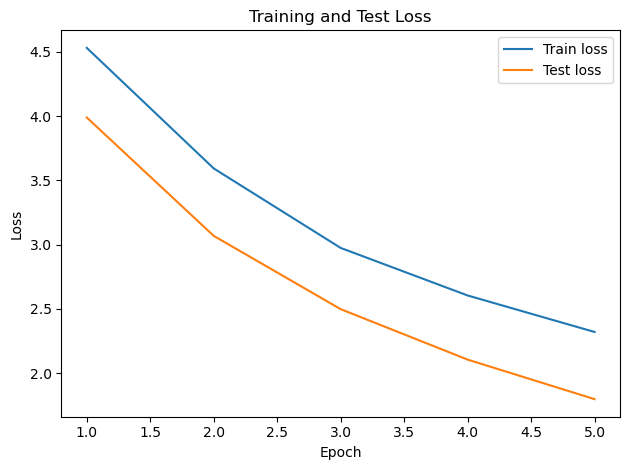

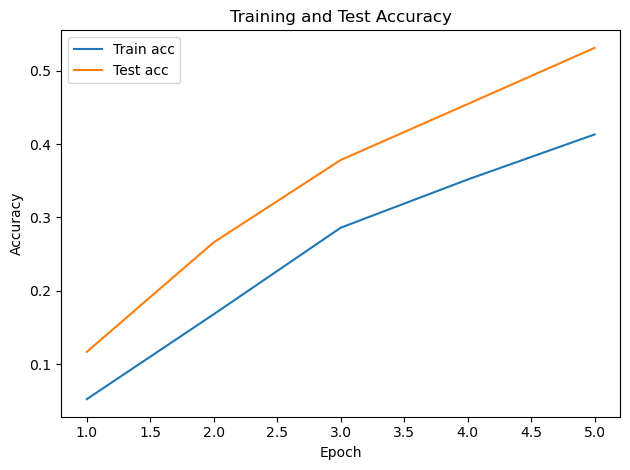

In [ ]:

utils.plot_loss_curves(results_base, save_dir="../models/TinyVGG_1")


## 6. Entrenamiento de TinyVGG_2 (modelo mejorado)

In [13]:

optimizer_improved = torch.optim.Adam(model_improved.parameters(), lr=LEARNING_RATE)

results_improved = engine.train(
    model=model_improved,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer_improved,
    epochs=NUM_EPOCHS,
    device=device,
)


Epoch: 1/5 | Train Loss: 5.0127 | Train Acc: 0.0060 | Test Loss: 5.0118 | Test Acc: 0.0066
Epoch: 2/5 | Train Loss: 5.0079 | Train Acc: 0.0082 | Test Loss: 5.0137 | Test Acc: 0.0066
Epoch: 3/5 | Train Loss: 5.0055 | Train Acc: 0.0096 | Test Loss: 5.0169 | Test Acc: 0.0066
Epoch: 4/5 | Train Loss: 5.0047 | Train Acc: 0.0096 | Test Loss: 5.0180 | Test Acc: 0.0066
Epoch: 5/5 | Train Loss: 5.0039 | Train Acc: 0.0096 | Test Loss: 5.0193 | Test Acc: 0.0066


### Curvas de TinyVGG_2

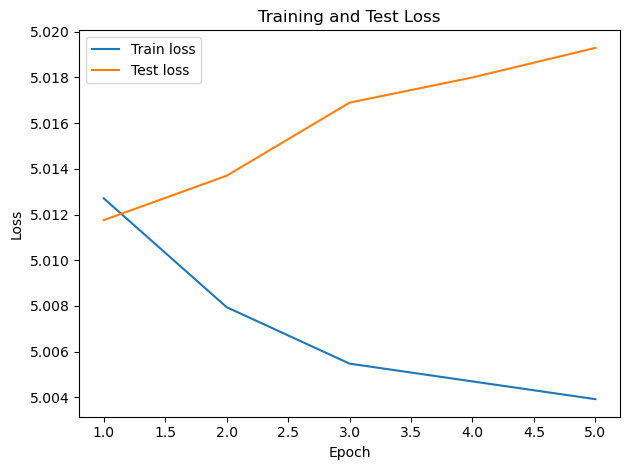

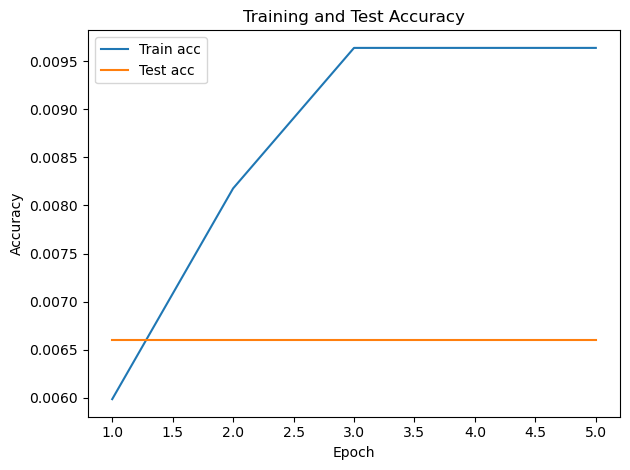

In [17]:

utils.plot_loss_curves(results_improved, save_dir="../models/TinyVGG_2")


## 7. Comparación rápida de resultados

In [18]:

print("TinyVGG_1-> "
      f"Train Acc: {results_base['train_acc'][-1]:.4f} | "
      f"Test Acc: {results_base['test_acc'][-1]:.4f}")
print("TinyVGG_2 "
      f"Train Acc: {results_improved['train_acc'][-1]:.4f} | "
      f"Test Acc: {results_improved['test_acc'][-1]:.4f}")


TinyVGG_1-> Train Acc: 0.4131 | Test Acc: 0.5311
TinyVGG_2 Train Acc: 0.0096 | Test Acc: 0.0066
